In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library


Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.22.0               |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          97 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-1.22.0-pyh9f0ad1d_0



geopy-1.22.0         | 63 KB     | ##################################### | 100% 
geographiclib-1.50   | 34 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: 

In [2]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

Data downloaded!


In [3]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [4]:
neighborhoods_data = newyork_data['features']

In [5]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [6]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [7]:
neighborhoods.shape

(306, 4)

In [8]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [9]:
CLIENT_ID = 'RVTLNG03UE02P4M5D22RB4VUYAYCHO2MMELOY4L2CTLQU13G' # your Foursquare ID
CLIENT_SECRET = 'IN3XMCX5WVTU1MEZXIZDJFJKJHPFQYOVJPZIFFKEWTRRNIVM' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: RVTLNG03UE02P4M5D22RB4VUYAYCHO2MMELOY4L2CTLQU13G
CLIENT_SECRET:IN3XMCX5WVTU1MEZXIZDJFJKJHPFQYOVJPZIFFKEWTRRNIVM


In [15]:
LIMIT=100

radius = 500
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [17]:
ny_venues = getNearbyVenues(names=neighborhoods['Neighborhood'],
                                   latitudes=neighborhoods['Latitude'],
                                   longitudes=neighborhoods['Longitude']
                                  )

Wakefield
Co-op City
Eastchester
Fieldston
Riverdale
Kingsbridge
Marble Hill
Woodlawn
Norwood
Williamsbridge
Baychester
Pelham Parkway
City Island
Bedford Park
University Heights
Morris Heights
Fordham
East Tremont
West Farms
High  Bridge
Melrose
Mott Haven
Port Morris
Longwood
Hunts Point
Morrisania
Soundview
Clason Point
Throgs Neck
Country Club
Parkchester
Westchester Square
Van Nest
Morris Park
Belmont
Spuyten Duyvil
North Riverdale
Pelham Bay
Schuylerville
Edgewater Park
Castle Hill
Olinville
Pelham Gardens
Concourse
Unionport
Edenwald
Bay Ridge
Bensonhurst
Sunset Park
Greenpoint
Gravesend
Brighton Beach
Sheepshead Bay
Manhattan Terrace
Flatbush
Crown Heights
East Flatbush
Kensington
Windsor Terrace
Prospect Heights
Brownsville
Williamsburg
Bushwick
Bedford Stuyvesant
Brooklyn Heights
Cobble Hill
Carroll Gardens
Red Hook
Gowanus
Fort Greene
Park Slope
Cypress Hills
East New York
Starrett City
Canarsie
Flatlands
Mill Island
Manhattan Beach
Coney Island
Bath Beach
Borough Park
Dyker

In [18]:
ny_venues.shape

(9823, 7)

In [19]:
ny_venues.groupby('Neighborhood').count()

Neighborhood Latitude  Neighborhood Longitude  \
Neighborhood                                                               
Allerton                                      29                      29   
Annadale                                      12                      12   
Arden Heights                                  4                       4   
Arlington                                      4                       4   
Arrochar                                      20                      20   
Arverne                                       18                      18   
Astoria                                       92                      92   
Astoria Heights                               12                      12   
Auburndale                                    18                      18   
Bath Beach                                    47                      47   
Battery Park City                             62                      62   
Bay Ridge                                     87                      87   
Bay Terrace                                   47                      47   
Baychester                                    20                      20   
Bayside                                       72                      72   
Bayswater                                      2                       2   
Bedford Park                                  34                      34   
Bedford Stuyvesant                            29                      29   
Beechhurst                                    14                      14   
Bellaire                                      12                      12   
Belle Harbor                                  18                      18   
Bellerose                                     21                      21   
Belmont                                       98                      98   
Bensonhurst                                   31                      31   
Bergen Beach                                   8                       8   
Blissville                                    17                      17   
Bloomfield                                     5                       5   
Boerum Hill                                   93                      93   
Borough Park                                  19                      19   
Breezy Point                                   4                       4   
Briarwood                                     11                      11   
Brighton Beach                                44                      44   
Broad Channel                                  6                       6   
Broadway Junction                             18                      18   
Bronxdale                                     13                      13   
Brooklyn Heights                             100                     100   
Brookville                                     1                       1   
Brownsville                                   18                      18   
Bulls Head                                    44                      44   
Bushwick                                      72                      72   
Butler Manor                                   6                       6   
Cambria Heights                               12                      12   
Canarsie                                       5                       5   
Carnegie Hill                                 84                      84   
Carroll Gardens                              100                     100   
Castle Hill                                    9                       9   
Castleton Corners                             14                      14   
Central Harlem                                46                      46   
Charleston                                    28                      28   
Chelsea                                      106                     106   
Chinatown                                    100                     100   

In [21]:
# one hot encoding
ny_onehot = pd.get_dummies(ny_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
ny_onehot['Neighborhood'] = ny_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [ny_onehot.columns[-1]] + list(ny_onehot.columns[:-1])
ny_onehot = ny_onehot[fixed_columns]
ny_onehot.set_index('Neighborhood',inplace=True)
ny_onehot.groupby('Neighborhood').count()


Yoga Studio  Accessories Store  Adult Boutique  \
Neighborhood                                                                
Allerton                            29                 29              29   
Annadale                            12                 12              12   
Arden Heights                        4                  4               4   
Arlington                            4                  4               4   
Arrochar                            20                 20              20   
Arverne                             18                 18              18   
Astoria                             92                 92              92   
Astoria Heights                     12                 12              12   
Auburndale                          18                 18              18   
Bath Beach                          47                 47              47   
Battery Park City                   62                 62              62   
Bay Ridge                           87                 87              87   
Bay Terrace                         47                 47              47   
Baychester                          20                 20              20   
Bayside                             72                 72              72   
Bayswater                            2                  2               2   
Bedford Park                        34                 34              34   
Bedford Stuyvesant                  29                 29              29   
Beechhurst                          14                 14              14   
Bellaire                            12                 12              12   
Belle Harbor                        18                 18              18   
Bellerose                           21                 21              21   
Belmont                             98                 98              98   
Bensonhurst                         31                 31              31   
Bergen Beach                         8                  8               8   
Blissville                          17                 17              17   
Bloomfield                           5                  5               5   
Boerum Hill                         93                 93              93   
Borough Park                        19                 19              19   
Breezy Point                         4                  4               4   
Briarwood                           11                 11              11   
Brighton Beach                      44                 44              44   
Broad Channel                        6                  6               6   
Broadway Junction                   18                 18              18   
Bronxdale                           13                 13              13   
Brooklyn Heights                   100                100             100   
Brookville                           1                  1               1   
Brownsville                         18                 18              18   
Bulls Head                          44                 44              44   
Bushwick                            72                 72              72   
Butler Manor                         6                  6               6   
Cambria Heights                     12                 12              12   
Canarsie                             5                  5               5   
Carnegie Hill                       84                 84              84   
Carroll Gardens                    100                100             100   
Castle Hill                          9                  9               9   
Castleton Corners                   14                 14              14   
Central Harlem                      46                 46              46   
Charleston                          28                 28              28   
Chelsea                            106                106             106   
Chinatown              

In [22]:
ny_total=ny_onehot.sum(axis=0)
ny_Asia=ny_total[['Chinese Restaurant','Japanese Restaurant','Korean Restaurant','Thai Restaurant']]
ny_Asia

Chinese Restaurant     217
Japanese Restaurant     89
Korean Restaurant       68
Thai Restaurant         90
dtype: int64

In [59]:
#Chinese/Asia

c_a=217/(217+89+68+90)
c_a

0.4676724137931034

In [61]:
#Chinese/Total
c_t=217/9819
c_t

0.02210001018433649

In [37]:
ny_total.sum()

9819

In [53]:
nyp=pd.read_csv('nyp.csv')
nyp.sort_values('Year', ascending=True,inplace=True)
nyp.reset_index(drop=True,inplace=True)


ValueError: invalid literal for int() with base 10: '14,164,000'

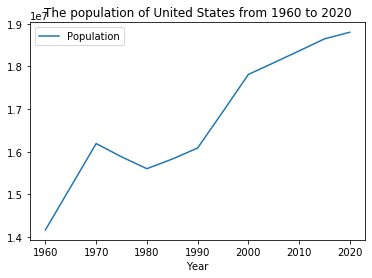

In [54]:
import matplotlib.pyplot as plt
import pandas as pd
nyp.plot(kind='line',x='Year',y='Population')
plt.title('The population of United States from 1960 to 2020')
plt.show()


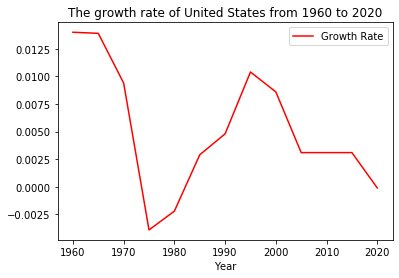

In [56]:
nyp.plot(kind='line',x='Year',y='Growth Rate', color='r')
plt.title('The growth rate of United States from 1960 to 2020')
plt.show()

In [62]:
#Population density
nyp['density']=nyp['Population']/302.6

In [63]:
nyp.head(13)

Year  Population  Growth Rate       density
0   1960    14164000       0.0140  46807.666887
1   1965    15177000       0.0139  50155.320555
2   1970    16191000       0.0094  53506.278916
3   1975    15880000      -0.0039  52478.519498
4   1980    15601000      -0.0022  51556.510245
5   1985    15827000       0.0029  52303.370787
6   1990    16086000       0.0048  53159.286186
7   1995    16943000       0.0104  55991.407799
8   2000    17813000       0.0086  58866.490416
9   2005    18087000       0.0031  59771.976206
10  2010    18365000       0.0031  60690.680767
11  2015    18648000       0.0031  61625.908790
12  2020    18804000      -0.0001  62141.440846

In [65]:
#Asia population
a_p=1880400*0.118
#Asia density
a_d=a_p/302.6
a_d

733.2690019828154

In [69]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
X=nyp[['Year']]
y=nyp['Population']
pre_ny=LinearRegression()
pre_ny.fit(X,y)
pre_ny



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [70]:
import seaborn as sns
%matplotlib inline 

(1960, 2024.6182123655908)

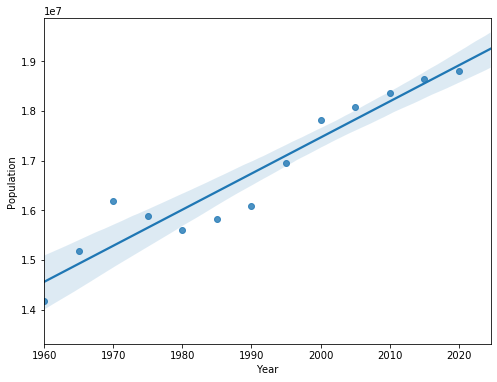

In [76]:
width = 8
height = 6
plt.figure(figsize=(width, height))
sns.regplot(x="Year", y="Population", data=nyp)
plt.xlim(1960,)

In [89]:
pre_ny.intercept_

                     

-127705999.99999997

In [90]:
pre_ny.coef_

array([72584.61538462])

In [91]:
#PREDICT 2025
p25=2025*pre_ny.coef_+pre_ny.intercept_
p25


array([19277846.15384614])

In [ ]:
#PREDICT 2030
p30=2030*pre_ny.coef_+pre_ny.intercept_
p25